In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
dir = '/home/user/Desktop/Datos/'
#dir = '/Users/antoniomendez/Desktop/Tesis/Datos/datos_limpios/'

In [3]:
def count_trips_mibici(data_user, threshold = 5):
    viajes_user = data_user.groupby([data_user[['Origen_Id', 'Destino_Id']].min(axis=1), data_user[['Origen_Id', 'Destino_Id']].max(axis=1)]).size().reset_index(name='counts')
    viajes_user.columns = ['Est_A', 'Est_B', 'counts']
    viajes_user = viajes_user[viajes_user['counts'] >= threshold]
    total = viajes_user['counts'].sum()
    viajes_user['prob'] = viajes_user['counts']/total
    return viajes_user

def leer_matriz(nombre_archivo):
    matriz = []
    with open(nombre_archivo, 'r') as archivo:
        archivo.readline()
        archivo.readline()
        for linea in archivo:
            fila = [float(valor) for valor in linea.strip().split()]
            matriz.append(fila)
    return matriz

def encontrar_estacion(est, matriz):
    for i in range(len(matriz)):
        if matriz[i][0] == est:
            return matriz[i][1], matriz[i][2]
    return None, None

In [4]:
def compute_entropy(counter_user):
    '''
    args:
    counter_user: DataFrame with columns Est_A, Est_B, counts, prob given by count_trips_mibici by a specific user
    total_counter: DataFrame with columns Est_A, Est_B, counts, prob given by count_trips_mibici by all users
    return:
    entropy: float with the entropy
    '''
    entropy = 0
    for i in range(len(counter_user)):
        prob = counter_user.iloc[i]['prob']
        entropy -= prob * np.log(prob)
    return entropy

In [9]:
def m1(counter_user):
    vertex = list(set(counter_user['Est_A'].unique().tolist() + counter_user['Est_B'].unique().tolist()))
    v = len(vertex)
    e = len(counter_user)
    #print(v, e)

    if v == 1:
        return 0
    elif v == 0:
        return None
    else:
        return 1 - 2*e/(v*(v-1))

In [5]:
# Load data
data_2019 = pd.read_csv(f'{dir}mibici/2019.csv')
data = data_2019[data_2019['Inicio_del_viaje'].str.startswith('2019-01')]
del data_2019
estaciones = leer_matriz(f'{dir}Adj_mibici/matrices_estaciones/est_2019.txt')

In [6]:
users_counts = data['Usuario_Id'].value_counts()
users = users_counts[users_counts > 5].index.tolist()

In [7]:
len(users)

13150

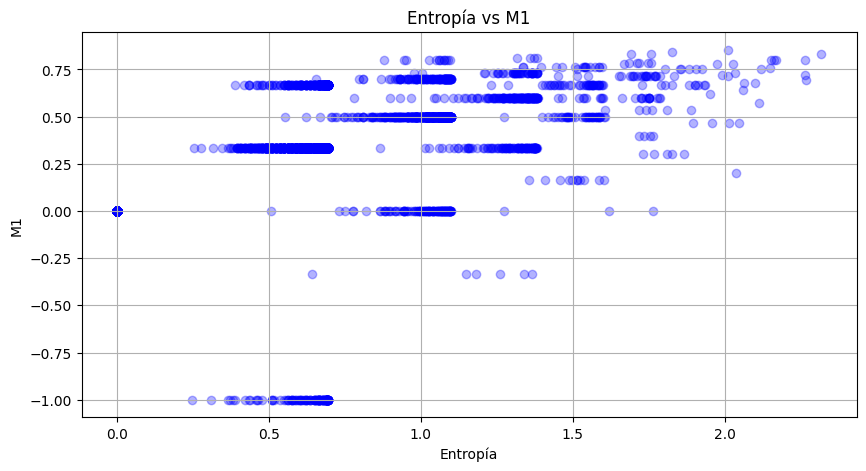

In [10]:
plt.figure(figsize=(10, 5))
for user in users:
    data_user = data[data['Usuario_Id'] == user]
    #print(user)
    counter_user = count_trips_mibici(data_user)
    entropy = compute_entropy(counter_user)
    m1_user = m1(counter_user)
    if m1_user is not None:
        plt.scatter(entropy, m1_user, alpha = 0.3, color='b')
    #plt.scatter(entropy, m1_user, color='b')
plt.xlabel('Entropía')
plt.ylabel('M1')
plt.grid()
plt.title('Entropía vs M1')
plt.show()

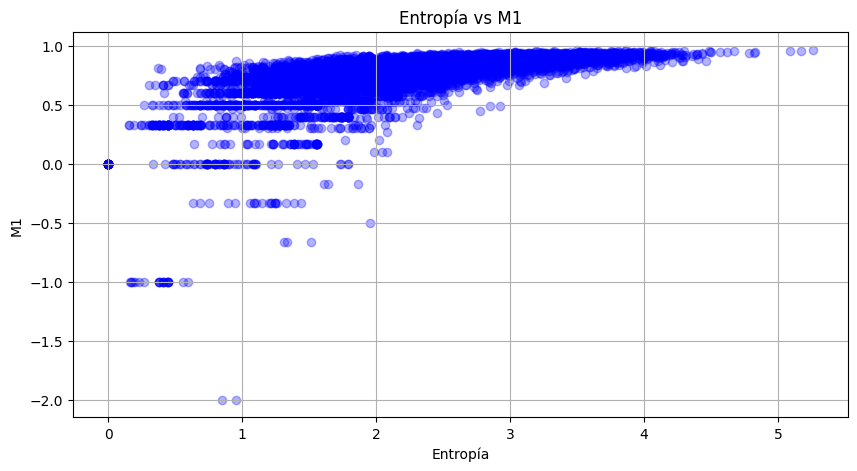

In [11]:
plt.figure(figsize=(10, 5))
for user in users:
    data_user = data[data['Usuario_Id'] == user]
    #print(user)
    counter_user = count_trips_mibici(data_user, threshold=1)
    entropy = compute_entropy(counter_user)
    m1_user = m1(counter_user)
    if m1_user is not None:
        plt.scatter(entropy, m1_user, alpha = 0.3, color='b')
    #plt.scatter(entropy, m1_user, color='b')
plt.xlabel('Entropía')
plt.ylabel('M1')
plt.grid()
plt.title('Entropía vs M1')
plt.show()

In [18]:
for user in users:
    data_user = data[data['Usuario_Id'] == user]
    counter_user = count_trips_mibici(data_user)
    m1_user = m1(counter_user)
    if m1_user is not None and m1_user < 0:
        print(user, m1_user)
        vertex = list(set(counter_user['Est_A'].unique().tolist() + counter_user['Est_B'].unique().tolist()))
        v = len(vertex)
        e = len(counter_user)
        print(v, e)

233327 -0.33333333333333326
3 4
236373 -1.0
2 2
213067 -0.33333333333333326
3 4
406656 -1.0
2 2
443421 -1.0
2 2
227664 -1.0
2 2
375703 -1.0
2 2
246570 -1.0
2 2
370211 -1.0
2 2
415461 -1.0
2 2
140556 -1.0
2 2
323353 -1.0
2 2
425460 -1.0
2 2
63207 -1.0
2 2
3614 -1.0
2 2
436422 -0.33333333333333326
3 4
746 -1.0
2 2
50752 -1.0
2 2
306614 -1.0
2 2
301130 -1.0
2 2
305552 -1.0
2 2
276265 -1.0
2 2
203214 -1.0
2 2
423412 -0.33333333333333326
3 4
462603 -1.0
2 2
345210 -1.0
2 2
265730 -0.33333333333333326
3 4
436246 -1.0
2 2
452675 -1.0
2 2
426271 -1.0
2 2
243326 -1.0
2 2
440250 -1.0
2 2
136752 -1.0
2 2
435124 -1.0
2 2
345403 -1.0
2 2
333341 -1.0
2 2
3162 -1.0
2 2
234512 -1.0
2 2
437021 -1.0
2 2
417133 -1.0
2 2
374473 -1.0
2 2
37061 -1.0
2 2
33526 -1.0
2 2
300176 -1.0
2 2
357635 -1.0
2 2
432663 -1.0
2 2
221034 -1.0
2 2
450437 -1.0
2 2
222511 -1.0
2 2
340450 -1.0
2 2
172373 -1.0
2 2
202117 -1.0
2 2
340401 -1.0
2 2
453175 -1.0
2 2
114304 -1.0
2 2
171631 -1.0
2 2
426767 -1.0
2 2
70260 -1.0
2 2
3616

In [21]:
count_trips_mibici(data[data['Usuario_Id'] == 236373])

,Est_A,Est_B,counts,prob
1,2,9,10,0.092593
4,9,9,98,0.907407


In [12]:
def m2(counter_user):
    vertex = list(set(counter_user['Est_A'].unique().tolist() + counter_user['Est_B'].unique().tolist()))
    v = len(vertex)
    e = len(counter_user)
    if v == 1:
        return 0
    elif v == 0:
        return None
    else:
        return 1 - 2*e/(v**2+v)

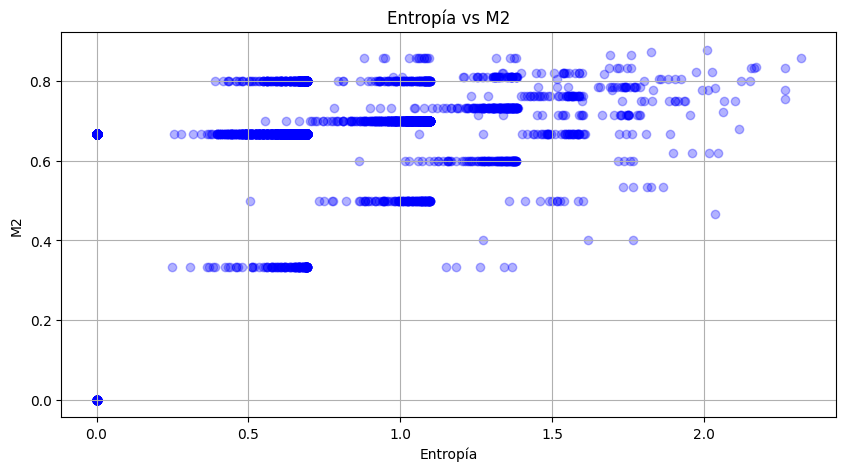

In [ ]:
plt.figure(figsize=(10, 5))
for user in users:
    data_user = data[data['Usuario_Id'] == user]
    #print(user)
    counter_user = count_trips_mibici(data_user)
    entropy = compute_entropy(counter_user)
    m1_user = m2(counter_user)
    if m1_user is not None:
        plt.scatter(entropy, m1_user, alpha = 0.3, color='b')
    #plt.scatter(entropy, m1_user, color='b')
plt.xlabel('Entropía')
plt.ylabel('M2')
plt.grid()
plt.title('Entropía vs M2')
plt.show()

Con T=1

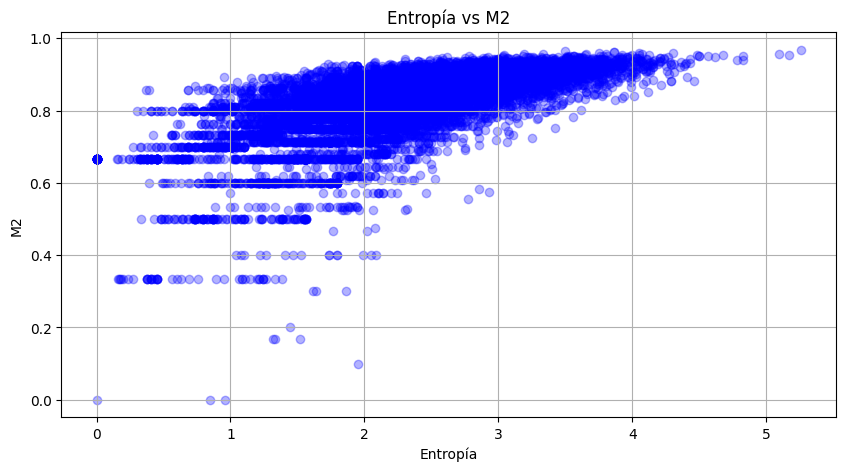

In [13]:
plt.figure(figsize=(10, 5))
for user in users:
    data_user = data[data['Usuario_Id'] == user]
    #print(user)
    counter_user = count_trips_mibici(data_user, threshold=1)
    entropy = compute_entropy(counter_user)
    m1_user = m2(counter_user)
    if m1_user is not None:
        plt.scatter(entropy, m1_user, alpha = 0.3, color='b')
    #plt.scatter(entropy, m1_user, color='b')
plt.xlabel('Entropía')
plt.ylabel('M2')
plt.grid()
plt.title('Entropía vs M2')
plt.show()

In [14]:
directory = '/home/user/Desktop/Graficas/Graficas_M2'
if not os.path.exists(directory):
    os.makedirs(directory)

In [29]:
for i in range(1,32):
    current_data = data[data['Inicio_del_viaje'].str.startswith(f'2019-01-{i:02}')]
    current_users_counts = current_data['Usuario_Id'].value_counts()
    current_users = current_users_counts[current_users_counts > 0].index.tolist()
    plt.figure(figsize=(10, 5))
    print(f'2019-01-{i:02}, Total users: {len(current_users)}')
    for user in current_users:
        data_user = current_data[current_data['Usuario_Id'] == user]
        counter_user = count_trips_mibici(data_user)
        m1_user = m2(counter_user)
        entropy = compute_entropy(counter_user)
        if m1_user is not None:
            plt.scatter(entropy, m1_user, alpha = 0.3, color='b')
    plt.xlabel('Entropía')
    plt.ylabel('M2')
    plt.grid()
    plt.title(f'Entropía vs M2 2019-01-{i:02}')
    plt.savefig(f'{directory}/2019-01-{i:02}.png')
    plt.close()

2019-01-01, Total users: 1268
2019-01-02, Total users: 4221
2019-01-03, Total users: 4462
2019-01-04, Total users: 4595
2019-01-05, Total users: 3476
2019-01-06, Total users: 2830
2019-01-07, Total users: 5705
2019-01-08, Total users: 6066
2019-01-09, Total users: 6365
2019-01-10, Total users: 6479
2019-01-11, Total users: 6265
2019-01-12, Total users: 4659
2019-01-13, Total users: 3423
2019-01-14, Total users: 6754
2019-01-15, Total users: 6907
2019-01-16, Total users: 7478
2019-01-17, Total users: 7552
2019-01-18, Total users: 7522
2019-01-19, Total users: 4942
2019-01-20, Total users: 3666
2019-01-21, Total users: 7443
2019-01-22, Total users: 7769
2019-01-23, Total users: 7714
2019-01-24, Total users: 7608
2019-01-25, Total users: 7305
2019-01-26, Total users: 4795
2019-01-27, Total users: 3455
2019-01-28, Total users: 7180
2019-01-29, Total users: 7448
2019-01-30, Total users: 7533
2019-01-31, Total users: 7340


In [17]:
def m3(counter_user, alpha = 2):
    vertex = list(set(counter_user['Est_A'].unique().tolist() + counter_user['Est_B'].unique().tolist()))
    v = len(vertex)
    e = len(counter_user)
    l = counter_user['counts'].sum()

    if v == 0:
        return None
    else:
        D = 2*e/(v*(v+1))
        return 1 - D/(alpha*l + 2*np.sqrt(D))

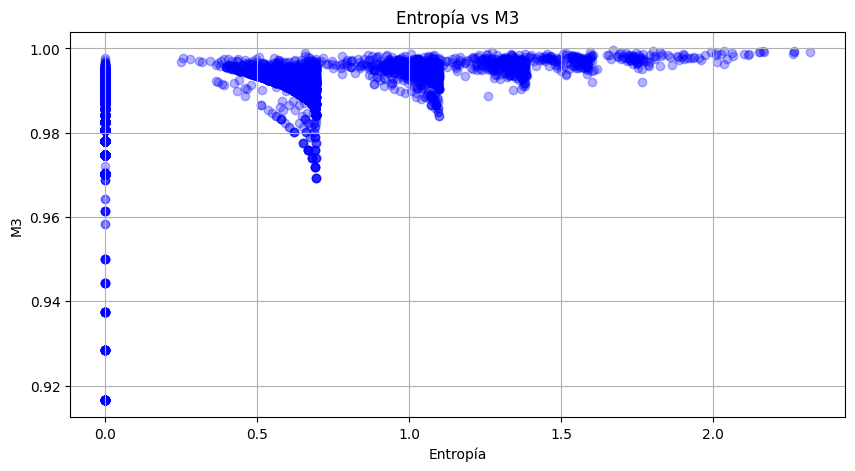

In [ ]:
plt.figure(figsize=(10, 5))
for user in users:
    data_user = data[data['Usuario_Id'] == user]
    #print(user)
    counter_user = count_trips_mibici(data_user)
    entropy = compute_entropy(counter_user)
    m1_user = m3(counter_user)
    if m1_user is not None:
        plt.scatter(entropy, m1_user, alpha = 0.3, color='b')
    #plt.scatter(entropy, m1_user, color='b')
plt.xlabel('Entropía')
plt.ylabel('M3')
plt.grid()
plt.title('Entropía vs M3')
plt.show()

Con T=1

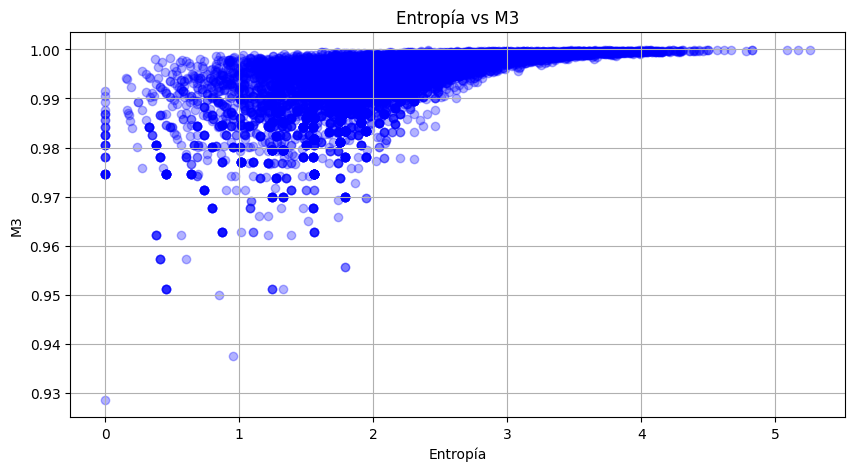

In [18]:
plt.figure(figsize=(10, 5))
for user in users:
    data_user = data[data['Usuario_Id'] == user]
    #print(user)
    counter_user = count_trips_mibici(data_user, threshold=1)
    entropy = compute_entropy(counter_user)
    m1_user = m3(counter_user)
    if m1_user is not None:
        plt.scatter(entropy, m1_user, alpha = 0.3, color='b')
    #plt.scatter(entropy, m1_user, color='b')
plt.xlabel('Entropía')
plt.ylabel('M3')
plt.grid()
plt.title('Entropía vs M3')
plt.show()

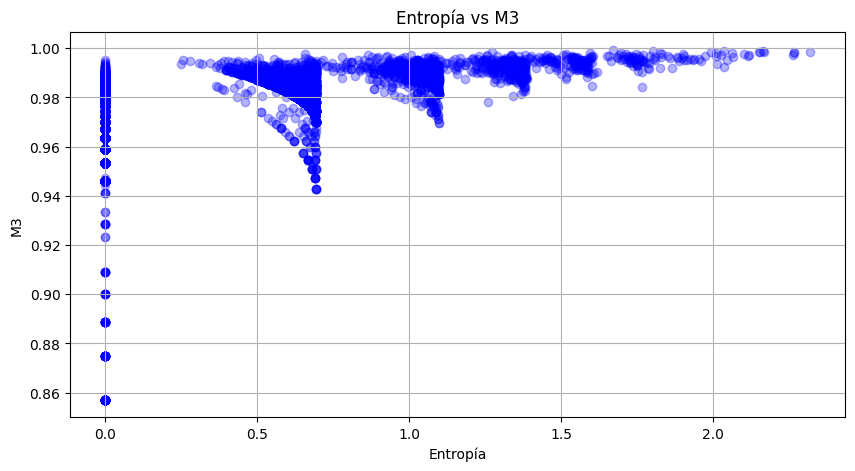

In [36]:
plt.figure(figsize=(10, 5))
for user in users:
    data_user = data[data['Usuario_Id'] == user]
    #print(user)
    counter_user = count_trips_mibici(data_user)
    entropy = compute_entropy(counter_user)
    m1_user = m3(counter_user, alpha=1)
    if m1_user is not None:
        plt.scatter(entropy, m1_user, alpha = 0.3, color='b')
    #plt.scatter(entropy, m1_user, color='b')
plt.xlabel('Entropía')
plt.ylabel('M3')
plt.grid()
plt.title('Entropía vs M3')
plt.show()

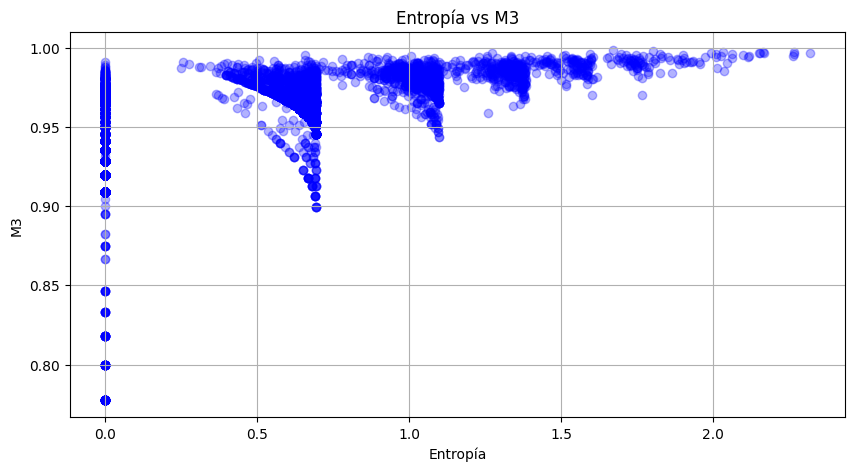

In [37]:
plt.figure(figsize=(10, 5))
for user in users:
    data_user = data[data['Usuario_Id'] == user]
    #print(user)
    counter_user = count_trips_mibici(data_user)
    entropy = compute_entropy(counter_user)
    m1_user = m3(counter_user, alpha=0.5)
    if m1_user is not None:
        plt.scatter(entropy, m1_user, alpha = 0.3, color='b')
    #plt.scatter(entropy, m1_user, color='b')
plt.xlabel('Entropía')
plt.ylabel('M3')
plt.grid()
plt.title('Entropía vs M3')
plt.show()

In [38]:
directory = '/home/user/Desktop/Graficas/Graficas_M3'
if not os.path.exists(directory):
    os.makedirs(directory)

for i in range(1,32):
    current_data = data[data['Inicio_del_viaje'].str.startswith(f'2019-01-{i:02}')]
    current_users_counts = current_data['Usuario_Id'].value_counts()
    current_users = current_users_counts[current_users_counts > 0].index.tolist()
    plt.figure(figsize=(10, 5))
    print(f'2019-01-{i:02}, Total users: {len(current_users)}')
    for user in current_users:
        data_user = current_data[current_data['Usuario_Id'] == user]
        counter_user = count_trips_mibici(data_user)
        m1_user = m3(counter_user, alpha=2)
        entropy = compute_entropy(counter_user)
        if m1_user is not None:
            plt.scatter(entropy, m1_user, alpha = 0.3, color='b')
    plt.xlabel('Entropía')
    plt.ylabel('M3')
    plt.grid()
    plt.title(f'Entropía vs M3 2019-01-{i:02}')
    plt.savefig(f'{directory}/2019-01-{i:02}.png')
    plt.close()

2019-01-01, Total users: 1268
2019-01-02, Total users: 4221
2019-01-03, Total users: 4462
2019-01-04, Total users: 4595
2019-01-05, Total users: 3476
2019-01-06, Total users: 2830
2019-01-07, Total users: 5705
2019-01-08, Total users: 6066
2019-01-09, Total users: 6365
2019-01-10, Total users: 6479
2019-01-11, Total users: 6265
2019-01-12, Total users: 4659
2019-01-13, Total users: 3423
2019-01-14, Total users: 6754
2019-01-15, Total users: 6907
2019-01-16, Total users: 7478
2019-01-17, Total users: 7552
2019-01-18, Total users: 7522
2019-01-19, Total users: 4942
2019-01-20, Total users: 3666
2019-01-21, Total users: 7443
2019-01-22, Total users: 7769
2019-01-23, Total users: 7714
2019-01-24, Total users: 7608
2019-01-25, Total users: 7305
2019-01-26, Total users: 4795
2019-01-27, Total users: 3455
2019-01-28, Total users: 7180
2019-01-29, Total users: 7448
2019-01-30, Total users: 7533
2019-01-31, Total users: 7340


In [19]:
import requests
requests.post("https://ntfy.sh/Compu_CIMAT",
    data="Terminé".encode(encoding='utf-8'))

<Response [200]>